## Data_Preprocessing FlowChart

In [1]:
# https://www.kaggle.com/code/kmader/flowcharts-pydot/notebook
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from io import StringIO
from IPython.display import SVG
import pydot

In [2]:
"""
pydot attributes
gobal dot attrbiutes, passed via the Dot.set_style method:
       rankdir = 'LR'   (draws the graph horizontally, left to right)
       ranksep = number (rank separation in inches)
node attributes, passed via the Dot.set_node_style method:
       style = 'filled' | 'invisible' | 'diagonals' | 'rounded'
       shape = 'box' | 'ellipse' | 'circle' | 'point' | 'triangle'
edge attributes, passed via the Dot.set_edge_style method:
       style     = 'dashed' | 'dotted' | 'solid' | 'invis' | 'bold'
       arrowhead = 'box' | 'crow' | 'diamond' | 'dot' | 'inv' | 'none' | 'tee' | 'vee'
       weight    = number (the larger the number the closer the nodes will be)
valid graphviz colors
for a full list of attributes and other details on how to precisely control the graph
"""

"\npydot attributes\ngobal dot attrbiutes, passed via the Dot.set_style method:\n       rankdir = 'LR'   (draws the graph horizontally, left to right)\n       ranksep = number (rank separation in inches)\nnode attributes, passed via the Dot.set_node_style method:\n       style = 'filled' | 'invisible' | 'diagonals' | 'rounded'\n       shape = 'box' | 'ellipse' | 'circle' | 'point' | 'triangle'\nedge attributes, passed via the Dot.set_edge_style method:\n       style     = 'dashed' | 'dotted' | 'solid' | 'invis' | 'bold'\n       arrowhead = 'box' | 'crow' | 'diamond' | 'dot' | 'inv' | 'none' | 'tee' | 'vee'\n       weight    = number (the larger the number the closer the nodes will be)\nvalid graphviz colors\nfor a full list of attributes and other details on how to precisely control the graph\n"

In [3]:
def make_node(name,shape, label = None):
    cur_node = pydot.Node(name)
    cur_node.set_shape(shape)
    cur_node.set_label(label)
    dot_graph.add_node(cur_node)
    return cur_node

def make_link(a_node, b_node, label = None, width = 1, style='solid'): #'dashed'
    cur_edge = pydot.Edge(a_node,b_node)
    cur_edge.set_penwidth(width)
    cur_edge.set_style(style)
    if label is not None: cur_edge.set_label(label)
    dot_graph.add_edge(cur_edge)
    return cur_edge

In [8]:
dot_graph = pydot.Dot(graph_type='digraph')

input_node = make_node('Input Data \n milk_plasma_all_data_mrg_020821.xlsx ', 'record', '{{Input Data \n milk_plasma_all_data_mrg_020821.xlsx}|{Rows: 183 entries, 1 to 183 | Columns: 496 entries, smiles to set}}')

# Drop all non numeric data
dropNumeric_node = make_node('df', 'record', '{{df}|{183 Rows | 490 Columns}}')
make_link(input_node, dropNumeric_node, '    Drop all non numeric data (to drop -> 5 Descriptors) \n    and the MP_RATIO column (to drop -> 1 output)', 'solid')

# Drop feature containing $ in the first position
dropDollar_node = make_node('df1', 'record', '{{df1}|{183 Rows | 485 Columns}}')
make_link(dropNumeric_node, dropDollar_node, '    Drop feature containing $ in the first position \n    (to drop -> 5 Descriptors)') 

# Drop all constant features
dropConstant_node = make_node('df2', 'record', '{{df2}|{183 Rows | 455 Columns}}')
make_link(dropDollar_node, dropConstant_node, '    Drop all constant features \n(to drop -> 30 Descriptors)') 

# Drop highly correlated feature (> 0.95)
dropCorrelated_node = make_node('df3', 'record', '{{df3=standardized_df.csv}|{183 Rows | 332 Columns}}')
make_link(dropConstant_node, dropCorrelated_node, '    Drop highly correlated feature (> 0.95) \n    ( to drop -> 123 Descriptors)') 


# Principal Component Analysis (PCA)
pca_node = make_node('df4', 'record', '{{df4=df_pca.csv \n Principal Component Analysis (PCA) \n explained variance between 95–99%}|{183 Rows | 52 Components}}')
make_link(dropCorrelated_node, pca_node)  
    
# SelectKbest
selectKbest_node = make_node('df5', 'record', '{{df5=df_KB_selected_variables.csv \n Select the best k number of features }|{183 Rows |  202 Columns}}')
make_link(dropCorrelated_node, selectKbest_node, 'SelectkBest \n p_val <= 0.05 \n f_score >= 5')  

# RFE_Optimum_Nb_of_features
rfe_node = make_node('df6', 'record', '{{df6 \n RFE_Optimum_Nb_of_features}|{183 Rows |  8 Columns}}')
make_link(dropCorrelated_node, rfe_node)  

# Forward Selection
frd_Selection_node = make_node('df7', 'record', '{{df7 \n Forward Selection}|{183 Rows |  11 Columns}}')
make_link(dropCorrelated_node, frd_Selection_node)  

# Random Forest Regression Feature Importance
rf_node = make_node('df8', 'record', '{{df8 \n Random Forest Regression Feature Importance}|{183 Rows |  30 Columns}}')
make_link(dropCorrelated_node, rf_node)

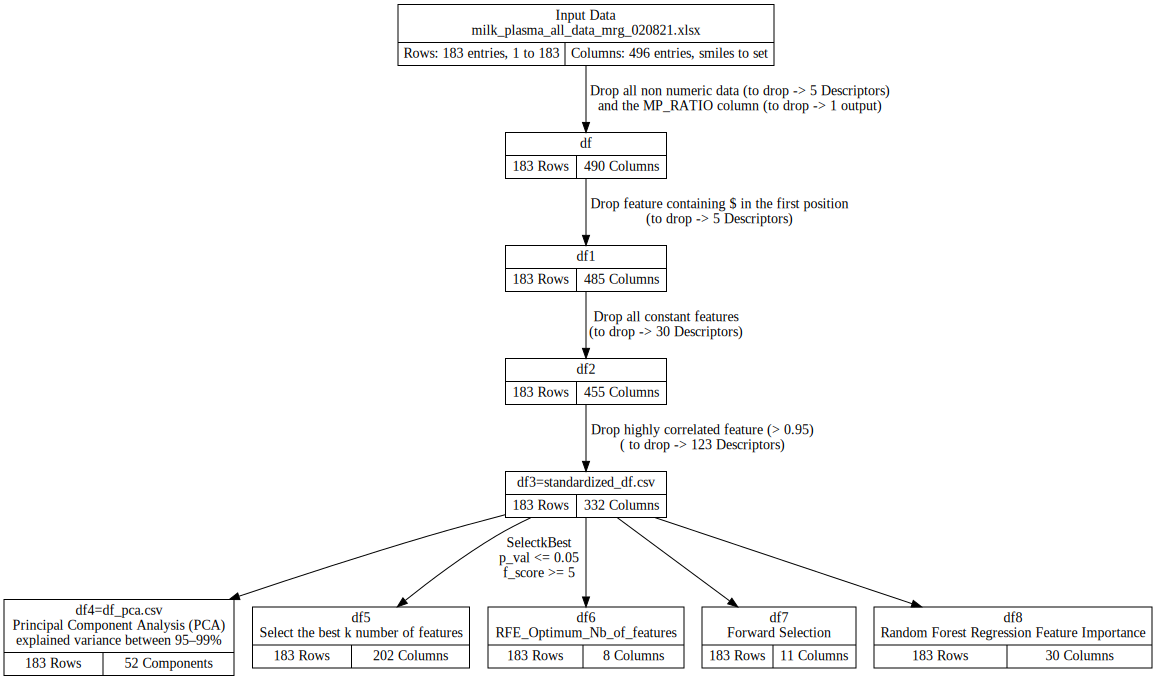

In [9]:
dot_graph.write_svg('Preprocessing_Flowcart.svg')
dot_graph.write_ps2('Preprocessing_Flowcart.ps2')
SVG('Preprocessing_Flowcart.svg')